In [223]:
# Import required library
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

# Scrape Wikipedia page
df = pd.read_html("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M", header = 0)
#Export dataframe to excel file
headings = ['Postcode', 'Borough', 'Neighbourhood']
df[0].to_csv("df.csv", index=False)
df = pd.DataFrame(df[0],columns=headings)
#Ignoring cells with a borough that is 'Not assigned'
df=df[~(df['Borough']== 'Not assigned')]
#Combining into one row with the neighborhoods separated with a comma
df=df.groupby(['Postcode','Borough'],as_index=False).agg(lambda x : x.sum() if x.dtype=='float64' else ', '.join(x))
#Not assigned neighborhood will be the same as the borough
df.loc[df.Neighbourhood == 'Not assigned', 'Neighbourhood'] = df['Borough'] 
#print the number of rows of your dataframe.
df.shape
headings = ['Postcode', 'Latitude', 'Longitude']
df1 = pd.read_csv("https://cocl.us/Geospatial_data" , names=headings, skiprows=1)
result=pd.merge(df, df1, on='Postcode', how='inner')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [224]:
toronto_data= result[result.Borough.str.contains('Toronto', case=False)]
toronto_data.reset_index(drop=True)
toronto_data
address = 'Toronto'

In [225]:
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [226]:
# map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data.Latitude, toronto_data.Longitude, toronto_data.Neighbourhood):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

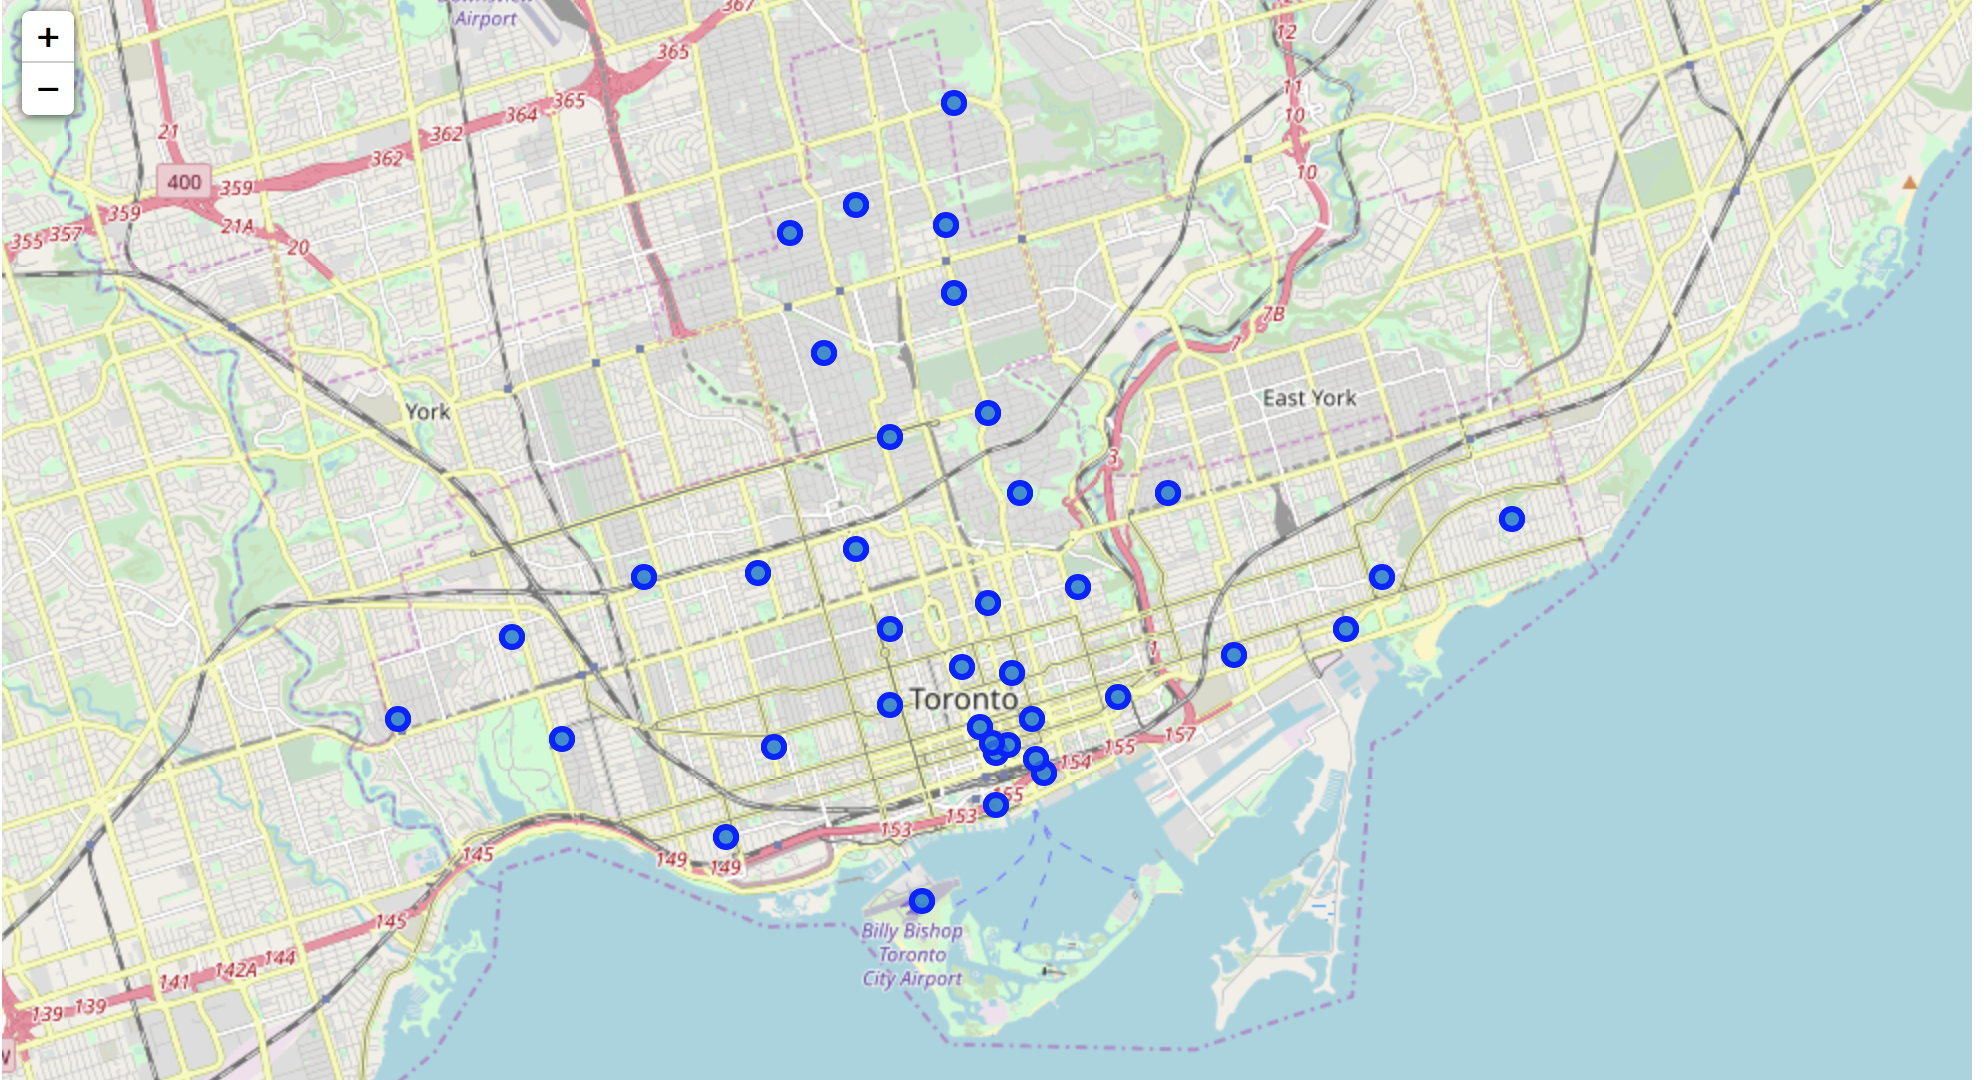

In [227]:
CLIENT_ID = 'J4Q3Q0XZV1VS4DHWIOV11SIL3CN5ZRU5WQQGJFHZSACBTZE1' # your Foursquare ID
CLIENT_SECRET = 'OZHSLJXO0X3JIZFFZ1F4DNYT0SBOMTDEJQOBTC22EQS441X4' # your Foursquare Secret
VERSION = '20190223' # Foursquare API version
neighbourhood_latitude = toronto_data.iloc[0, 3] # neighborhood latitude value
neighbourhood_longitude = toronto_data.iloc[0, 4] # neighborhood longitude value
neighbourhood_name = toronto_data.iloc[0, 2] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighbourhood_latitude, 
    neighbourhood_longitude, 
    radius, 
    LIMIT)
#url # display URL
results = requests.get(url).json()
#result

Latitude and longitude values of The Beaches are 43.67635739999999, -79.2930312.


In [228]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )



The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

In [229]:
print(toronto_venues.shape)
toronto_venues.head()

(1699, 7)


Neighbourhood  Neighbourhood Latitude  \
0                   The Beaches               43.676357   
1                   The Beaches               43.676357   
2                   The Beaches               43.676357   
3                   The Beaches               43.676357   
4  The Danforth West, Riverdale               43.679557   

   Neighbourhood Longitude                               Venue  \
0               -79.293031  The Big Carrot Natural Food Market   
1               -79.293031                 Grover Pub and Grub   
2               -79.293031                           Starbucks   
3               -79.293031                       Upper Beaches   
4               -79.352188                            Pantheon   

   Venue Latitude  Venue Longitude     Venue Category  
0       43.678879       -79.297734  Health Food Store  
1       43.679181       -79.297215                Pub  
2       43.678798       -79.298045        Coffee Shop  
3       43.680563       -79.292869       Neighborhood  
4       43.677621       -79.351434   Greek Restaurant

In [230]:
toronto_venues.groupby('Neighbourhood').count()

Neighbourhood Latitude  \
Neighbourhood                                                                
Adelaide, King, Richmond                                               100   
Berczy Park                                                             57   
Brockton, Exhibition Place, Parkdale Village                            19   
Business Reply Mail Processing Centre 969 Eastern                       18   
CN Tower, Bathurst Quay, Island airport, Harbou...                      13   
Cabbagetown, St. James Town                                             43   
Central Bay Street                                                      81   
Chinatown, Grange Park, Kensington Market                              100   
Christie                                                                16   
Church and Wellesley                                                    86   
Commerce Court, Victoria Hotel                                         100   
Davisville                                                              38   
Davisville North                                                         9   
Deer Park, Forest Hill SE, Rathnelly, South Hil...                      15   
Design Exchange, Toronto Dominion Centre                               100   
Dovercourt Village, Dufferin                                            20   
First Canadian Place, Underground city                                 100   
Forest Hill North, Forest Hill West                                      4   
Harbord, University of Toronto                                          35   
Harbourfront East, Toronto Islands, Union Station                      100   
Harbourfront, Regent Park                                               47   
High Park, The Junction South                                           23   
Lawrence Park                                                            4   
Little Portugal, Trinity                                                63   
Moore Park, Summerhill East                                              3   
North Toronto West                                                      21   
Parkdale, Roncesvalles                                                  16   
Rosedale                                                                 4   
Roselawn                                                                 3   
Runnymede, Swansea                                                      38   
Ryerson, Garden District                                               100   
St. James Town                                                         100   
Stn A PO Boxes 25 The Esplanade                                         94   
Studio District                                                         40   
The Annex, North Midtown, Yorkville                                     24   
The Beaches                                                              4   
The Beaches West, India Bazaar                                          19   
The Danforth West, Riverdale                                            42   

                                                    Neighbourhood Longitude  \
Neighbourhood                                                                 
Adelaide, King, Richmond                                                100   
Berczy Park                                                              57   
Brockton, Exhibition Place, Parkdale Village                             19   
Business Reply Mail Processing Centre 969 Eastern                        18   
CN Tower, Bathurst Quay, Island airport, Harbou...                       13   
Cabbagetown, St. James Town                                              43   
Central Bay Street                                                       81   
Chinatown, Grange Park, Kensington Market                               100   
Christie                                                                 16   
Church and Wellesley                                          

In [231]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

# Analyze Each Neighbourhood
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighbourhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighbourhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]



There are 237 uniques categories.


In [232]:
toronto_onehot.head()
toronto_onehot.shape

(1699, 238)

In [233]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped
toronto_grouped.shape

(38, 238)

In [214]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0          Coffee Shop  0.06
1                 Café  0.05
2      Thai Restaurant  0.04
3           Steakhouse  0.04
4  American Restaurant  0.04


----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1        Cocktail Bar  0.05
2          Restaurant  0.05
3  Italian Restaurant  0.04
4                Café  0.04


----Brockton, Exhibition Place, Parkdale Village----
                  venue  freq
0        Breakfast Spot  0.11
1                  Café  0.11
2           Coffee Shop  0.11
3  Gym / Fitness Center  0.05
4  Caribbean Restaurant  0.05


----Business Reply Mail Processing Centre 969 Eastern----
           venue  freq
0    Yoga Studio  0.06
1        Butcher  0.06
2  Garden Center  0.06
3         Garden  0.06
4    Pizza Place  0.06


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0    Airport Lounge  0.15
1

In [234]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighbourhood 1st Most Common Venue  \
0                           Adelaide, King, Richmond           Coffee Shop   
1                                        Berczy Park           Coffee Shop   
2       Brockton, Exhibition Place, Parkdale Village                  Café   
3  Business Reply Mail Processing Centre 969 Eastern           Yoga Studio   
4  CN Tower, Bathurst Quay, Island airport, Harbo...        Airport Lounge   

  2nd Most Common Venue 3rd Most Common Venue   4th Most Common Venue  \
0                  Café       Thai Restaurant     American Restaurant   
1            Restaurant          Cocktail Bar                    Café   
2        Breakfast Spot           Coffee Shop  Furniture / Home Store   
3      Recording Studio            Smoke Shop              Skate Park   
4       Airport Service      Airport Terminal           Boat or Ferry   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0             Steakhouse        Clothing Store      Asian Restaurant   
1            Cheese Shop                Bakery            Steakhouse   
2  Performing Arts Venue          Climbing Gym    Italian Restaurant   
3                Brewery         Burrito Place               Butcher   
4               Boutique               Airport    Airport Food Court   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0                Bakery                   Bar             Restaurant  
1    Italian Restaurant    Seafood Restaurant         Farmers Market  
2               Stadium  Caribbean Restaurant          Burrito Place  
3            Restaurant            Comic Shop          Auto Workshop  
4          Airport Gate       Harbor / Marina       Sculpture Garden

In [235]:
# Examine Clusters
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [236]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

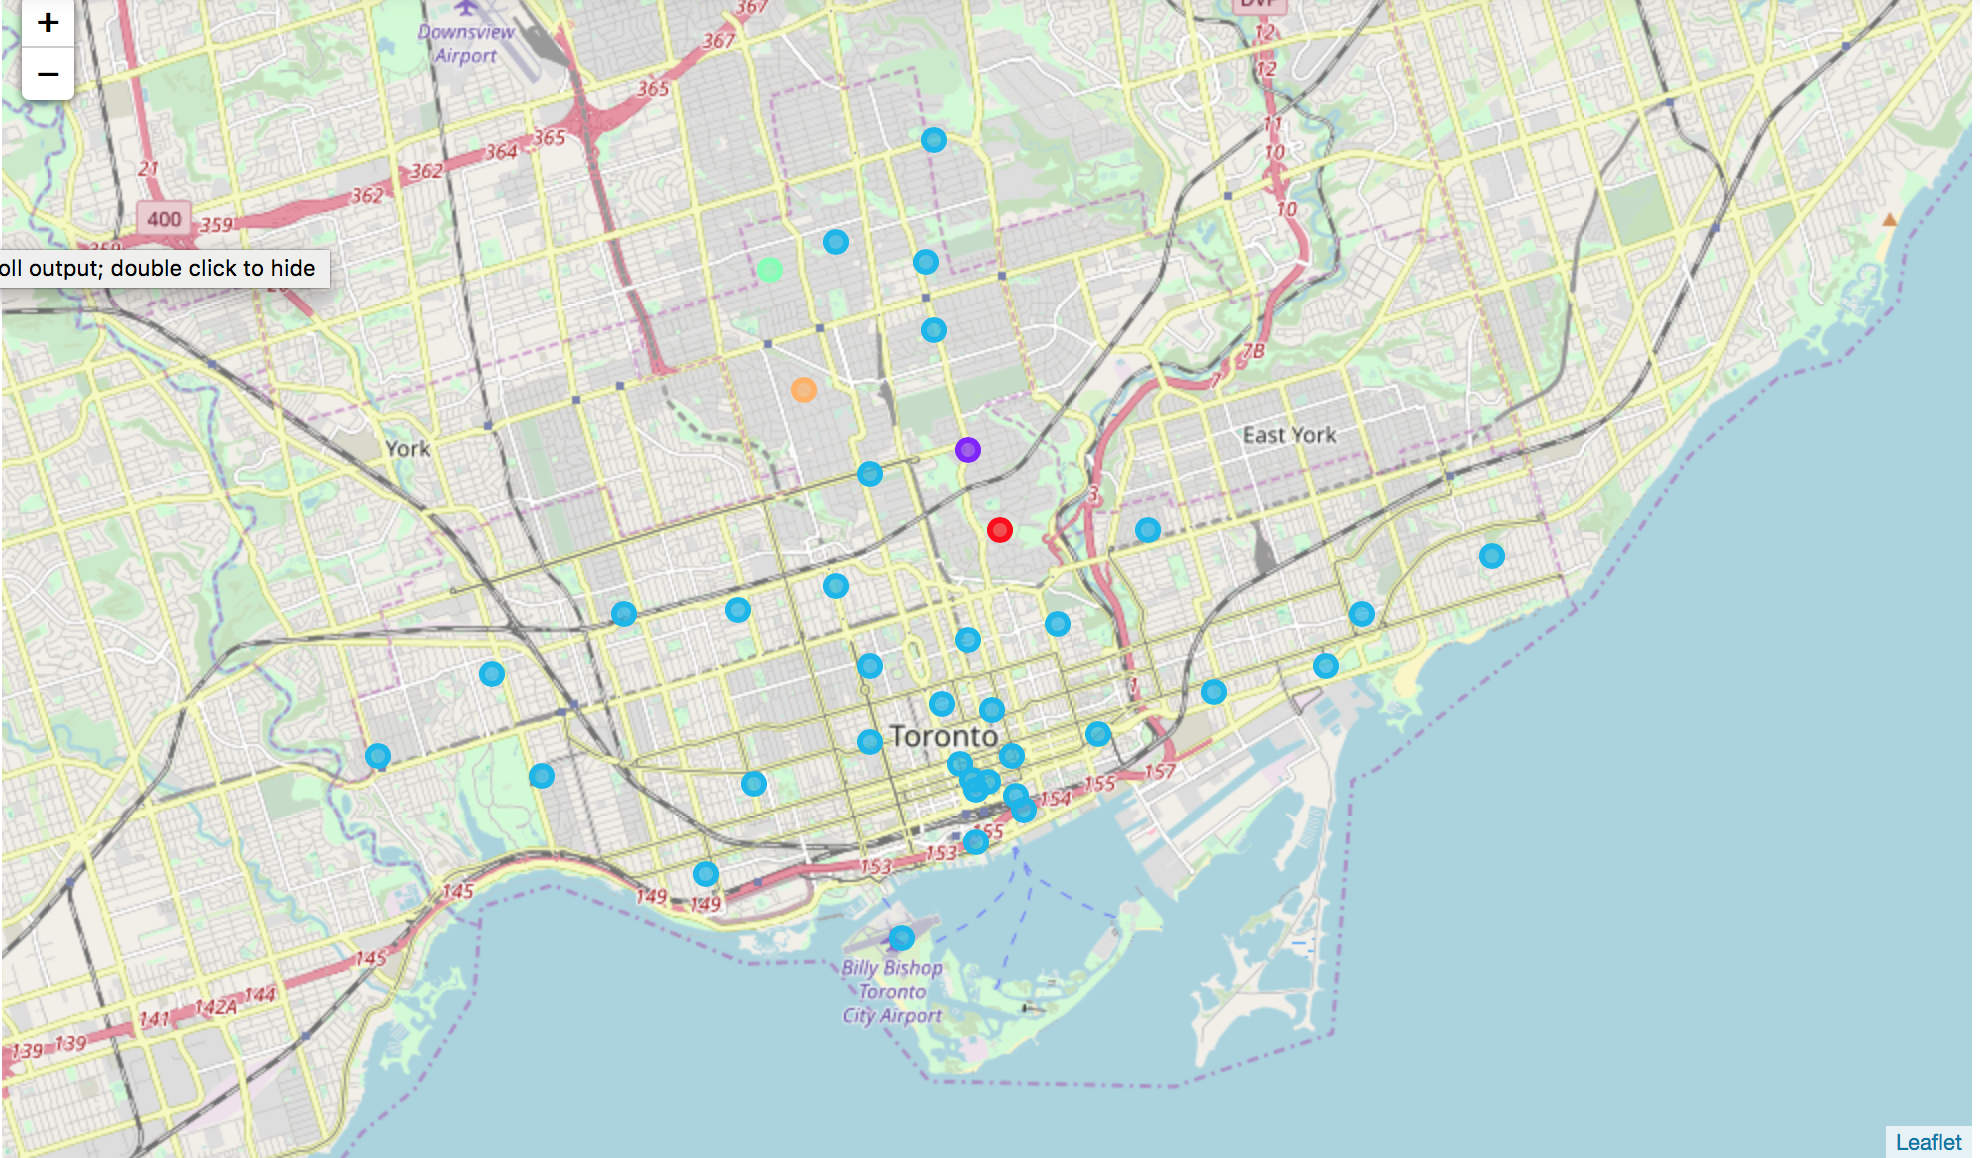

In [237]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
50  Downtown Toronto               0                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
50            Playground                 Trail                 Diner   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
50  Fast Food Restaurant        Farmers Market    Falafel Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
50           Event Space  Ethiopian Restaurant      Electronics Store

In [238]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
48  Central Toronto               1            Playground   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
48                   Gym            Restaurant                 Diner   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
48  Fast Food Restaurant        Farmers Market    Falafel Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
48           Event Space  Ethiopian Restaurant      Electronics Store

In [241]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
37      East Toronto               2          Neighborhood   
41      East Toronto               2      Greek Restaurant   
42      East Toronto               2        Sandwich Place   
43      East Toronto               2                  Café   
44   Central Toronto               2                  Park   
45   Central Toronto               2        Sandwich Place   
46   Central Toronto               2           Coffee Shop   
47   Central Toronto               2        Sandwich Place   
49   Central Toronto               2     Convenience Store   
51  Downtown Toronto               2           Coffee Shop   
52  Downtown Toronto               2   Japanese Restaurant   
53  Downtown Toronto               2           Coffee Shop   
54  Downtown Toronto               2           Coffee Shop   
55  Downtown Toronto               2           Coffee Shop   
56  Downtown Toronto               2           Coffee Shop   
57  Downtown Toronto               2           Coffee Shop   
58  Downtown Toronto               2           Coffee Shop   
59  Downtown Toronto               2           Coffee Shop   
60  Downtown Toronto               2           Coffee Shop   
61  Downtown Toronto               2           Coffee Shop   
65   Central Toronto               2           Coffee Shop   
66  Downtown Toronto               2                  Café   
67  Downtown Toronto               2                  Café   
68  Downtown Toronto               2        Airport Lounge   
69  Downtown Toronto               2           Coffee Shop   
70  Downtown Toronto               2           Coffee Shop   
75  Downtown Toronto               2                  Café   
76      West Toronto               2           Supermarket   
77      West Toronto               2                   Bar   
78      West Toronto               2                  Café   
82      West Toronto               2    Mexican Restaurant   
83      West Toronto               2        Breakfast Spot   
84      West Toronto               2           Coffee Shop   
87      East Toronto               2           Yoga Studio   

   2nd Most Common Venue  3rd Most Common Venue  \
37     Health Food Store            Coffee Shop   
41           Coffee Shop         Ice Cream Shop   
42          Liquor Store     Italian Restaurant   
43           Coffee Shop     Italian Restaurant   
44           Swim School     Dim Sum Restaurant   
45          Burger Joint         Breakfast Spot   
46        Clothing Store    Sporting Goods Shop   
47          Dessert Shop            Pizza Place   
49                   Pub            Coffee Shop   
51            Restaurant                 Bakery   
52           Coffee Shop       Sushi Restaurant   
53                  Café                    Pub   
54        Clothing Store                   Café   
55            Restaurant                  Hotel   
56            Restaurant           Cocktail Bar   
57                  Café     Italian Restaurant   
58                  Café        Thai Restaurant   
59              Aquarium                  Hotel   
60                  Café                  Hotel   
61                  Café             Restaurant   
65                  Café         Sandwich Place   
66           Coffee Shop                 Bakery   
67                   Bar  Vietnamese Restaurant   
68       Airport Service       Airport Terminal   
69            Restaurant                   Café   
70                  Café                  Hotel   
75         Grocery Store                   Park   
76                Bakery               Pharmacy   
77           Men's Store       Asian Restaurant   
78        Breakfast Spot            Coffee Shop   
82                  Café            Flea Market   
83             Gift Shop              Bookstore   
84                  Café            Pizza Place   
87      Recording Studio             Smoke Shop   

            4th Most Common Venue   5th Most Common Venu

In [239]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
63  Central Toronto               3          Home Service   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
63           Music Venue                Garden           Yoga Studio   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
63               Dog Run  Fast Food Restaurant        Farmers Market   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
63    Falafel Restaurant           Event Space   Ethiopian Restaurant

In [240]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

Borough  Cluster Labels 1st Most Common Venue  \
64  Central Toronto               4    Mexican Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
64                 Trail      Sushi Restaurant         Jewelry Store   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
64           Yoga Studio               Dog Run  Fast Food Restaurant   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
64        Farmers Market    Falafel Restaurant            Event Space